In [1]:
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline
sns.set(style="darkgrid", color_codes=True)
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [3]:
house_sales = pd.read_csv('kc_house_data.csv')
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
house_sales = house_sales.drop(['date','id'], axis=1)
house_sales.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
X = house_sales.drop('price', axis=1)
y = np.log(house_sales.price)
#y = house_sales.price

In [6]:
house_sales.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
categorical_columns = ['grade', 'waterfront', 'view', 'condition']

numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living',
                    'sqft_lot', 'floors', 'yr_renovated',
                    'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
                    'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [8]:
X = X[categorical_columns + numerical_columns]

In [9]:
# To use this experimental feature, we need to explicitly ask for it:
N_SPLITS = 5
rng = np.random.RandomState(0)

# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X_full = X.values
y_full = y.values
n_samples, n_features = X_full.shape

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
# Estimate the score on the entire dataset, with no missing values
br_estimator = RandomForestRegressor(random_state=0, criterion='friedman_mse',
                                        min_samples_split = 8,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=3, 
                                        n_estimators=30,
                                        min_weight_fraction_leaf=0.0)

In [12]:
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [13]:
# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

In [15]:
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS   
    )

In [16]:
score_simple_imputer_onehot = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        OneHotEncoder(categories='auto', handle_unknown='ignore'),
        br_estimator
    )
    
    score_simple_imputer_onehot[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [17]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    br_estimator
    )

In [18]:
score_iterative_imputer = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [19]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    OneHotEncoder(categories='auto', handle_unknown='ignore'),
    br_estimator
    )

In [20]:
score_iterative_imputer_onehot = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [21]:
scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer, score_iterative_imputer_onehot, 
     score_simple_imputer_onehot],
    keys=['Original', 'SimpleImputer', 'IterativeImputer', 'Iterative_&_Onehot', 'Simple_&_Onehot'], axis=1
    
)

In [22]:
means = -scores.mean()
errors = scores.std()

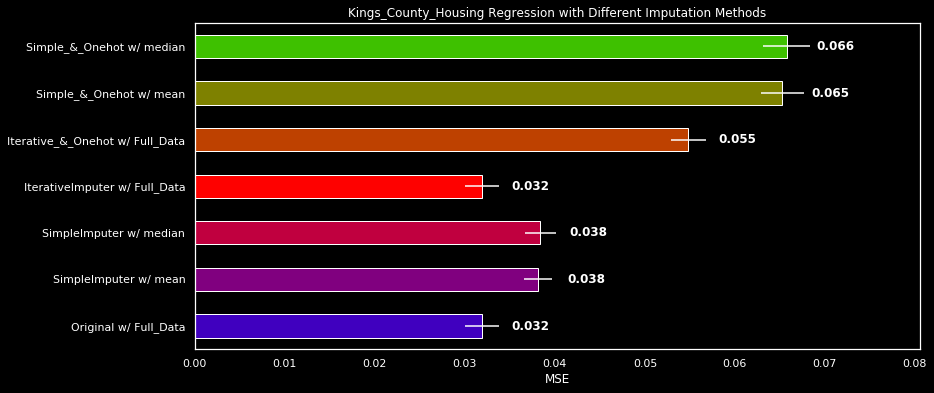

In [23]:
fig, ax = plt.subplots(figsize=(13, 6))
colors0 = sns.color_palette('brg', len(means))
means.plot.barh(xerr=errors, ax=ax, colors=colors0)
for i, v in enumerate(means.values):
        ax.text(v + 0.0075, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
ax.set_title('Kings_County_Housing Regression with Different Imputation Methods')
ax.set_xlabel('MSE')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.get_values()])
plt.margins(x=0.18)
plt.grid(False)
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [25]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    MaxAbsScaler(),
    br_estimator
    )

In [26]:
score_iterative_imputer_maxabs = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [27]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    MinMaxScaler(),
    br_estimator
    )

In [28]:
score_iterative_imputer_mnmxabs = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [29]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    StandardScaler(),
    br_estimator
    )

In [30]:
score_iterative_imputer_stdscl = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [31]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    RobustScaler(quantile_range=(25.0, 75.0)),
    br_estimator
    )

In [32]:
score_iterative_imputer_rbstscl = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [33]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    Normalizer(),
    br_estimator
    )

In [34]:
score_iterative_imputer_nrmlzr = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [35]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    QuantileTransformer(n_quantiles=730, output_distribution='normal', random_state=0),
    br_estimator
    )

In [36]:
score_iterative_imputer_qt = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [37]:
estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=br_estimator),
    PowerTransformer(),
    br_estimator
    )

In [38]:
score_iterative_imputer_pwr = pd.DataFrame(
    cross_val_score(
        estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    
    columns=['Full_Data']
)

In [39]:
scores0 = pd.concat(
    [score_iterative_imputer_maxabs, score_iterative_imputer_mnmxabs, score_iterative_imputer_stdscl, 
    score_iterative_imputer_rbstscl, score_iterative_imputer_nrmlzr, score_iterative_imputer_qt, 
    score_iterative_imputer_pwr],
    keys=['iterative_maxabs', 'iterative_mnmxabs', 'iterative_stdscl', 'iterative_rbstscl', 'iterative_nrmlzr',
          'iterative_qt', 'iterative_pwr'], axis=1
)

In [40]:
means0 = -scores0.mean()
errors0 = scores0.std()

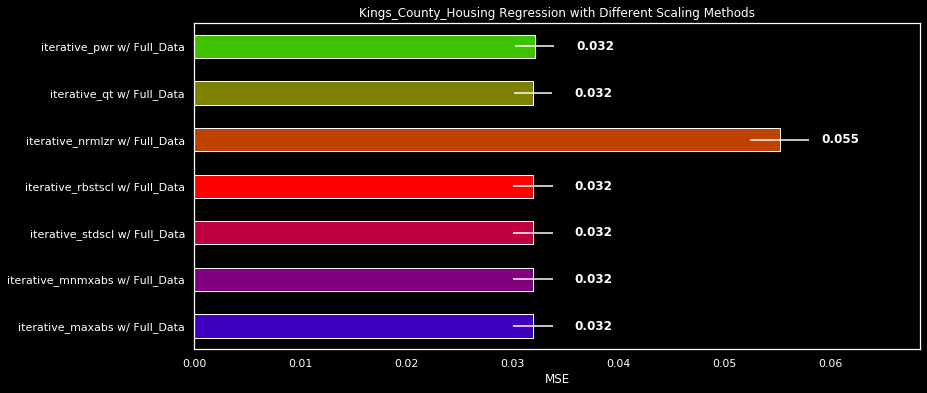

In [41]:
fig, ax = plt.subplots(figsize=(13, 6))
means0.plot.barh(xerr=errors0, ax=ax, colors=colors0)
for i, v in enumerate(means0.values):
        ax.text(v + 0.0075, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
ax.set_title('Kings_County_Housing Regression with Different Scaling Methods')
ax.set_xlabel('MSE')
ax.set_yticks(np.arange(means0.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means0.index.get_values()])
plt.margins(x=0.18)
plt.grid(False)
plt.show()

In [42]:
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

In [43]:
estimators = [
    
    Ridge(alpha=1.091599236819301, tol=0.0012744858310400511, random_state=0, fit_intercept=True),
    
    SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.00010000000000000026, fit_intercept=True,
                 tol=0.00010000000000000009, verbose=0, random_state=0,
                 learning_rate='invscaling', eta0=0.01, power_t=0.25, average=False),
    
    DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=1.9985657698763915,
                          min_samples_split=2, min_samples_leaf=13, min_weight_fraction_leaf=0.0,
                          max_features=1.0, random_state=0, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                          min_impurity_split=5),
    
    LinearSVR(epsilon=0.003651447080658049, tol=2.547030869157463e-05, C=15.568148066386238,
              loss='squared_epsilon_insensitive', fit_intercept=True,
              intercept_scaling=1.0, dual=False, verbose=0, random_state=0),
    
    KNeighborsRegressor(n_neighbors=1, weights='uniform', p=2),
    
    RandomForestRegressor(random_state=0, criterion='friedman_mse', min_samples_split = 8, 
                          max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=3, 
                          n_estimators=30, min_weight_fraction_leaf=0.0)
]

In [44]:
score_iterative_qt = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        QuantileTransformer(n_quantiles=730, output_distribution='normal', random_state=0),
        IterativeImputer(random_state=0, estimator=impute_estimator),
        impute_estimator
    )
    score_iterative_qt[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

In [45]:
scores1 = pd.concat([score_iterative_qt], keys=['iterative_qt'], axis=1)
means1 = -scores1.mean()
errors1 = scores1.std()

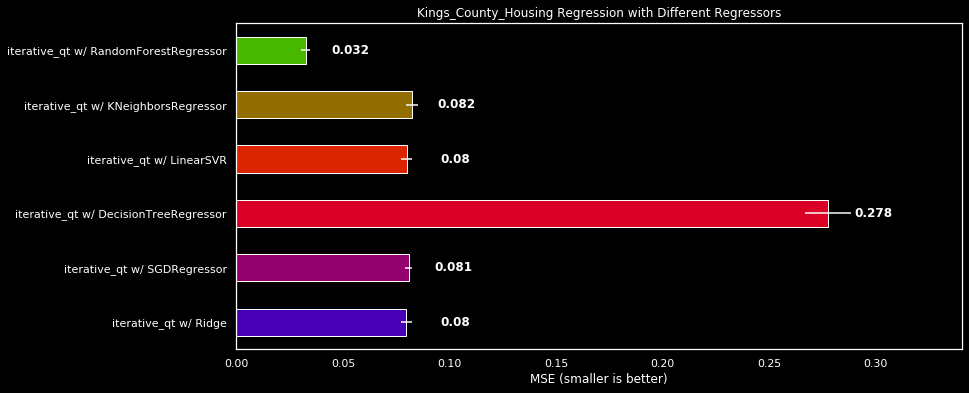

In [46]:
# plot boston results
fig, ax = plt.subplots(figsize=(13, 6))
colors1 = sns.color_palette('brg', len(means1))
means1.plot.barh(xerr=errors1, ax=ax, colors=colors1)
for i, v in enumerate(means1.values):
    ax.text(v + 0.03, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
ax.set_title('Kings_County_Housing Regression with Different Regressors')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means1.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means1.index.get_values()])
plt.margins(x=0.18)
plt.grid(False)
plt.show()